## Machine Learning Project

Welcome to the main project! Here you'll code your first ever machine learnining model.

Work through each cell below. Have the pdf 'ML Project' open alongside as this gives some extra hints and tips. The places where you need to write code will be clearly marked.

## Python Practice
The cells below give you a chance to practise the python we've talked about so far.

In [ ]:
## Practise Writing Python
# The code below is not fully complete, try to work out what should go in the gaps.
#The bits where you need to write something will be marked like this:

##YOUR CODE HERE...

#You don't need to change anything else!

# This script works out the average height of a group of friends.
def average_height(height1,height2,height3,height4,height5):

    sum_of_heights= ##YOUR CODE HERE...

    average= ##YOUR CODE HERE...

    return average

#This tests your function. If it's not working, try and work out why. If you're still stuck then ask the organiser.
#There is nothing for you to change in this section.
if __name__=='__main__':
    height1,height2,height3,height4,height5=1.5,1.6,1.7,1.6,1.5
    av=average_height(height1,height2,height3,height4,height5)
    if av==1.58:
            print('YOUR CODE WORKS!!')
    else:
            print('UH OH SOMETHING IS WRONG :(')





SyntaxError: invalid syntax (<ipython-input-3-2a8e235af6f3>, line 12)

Nice, now lets try write a function of your own. I'll provide the background, try fill the rest in.

In [ ]:
# Our data
girls_name = 'Jess'
boys_name = 'Matt'
girls_age = 15
boys_age = 17

## Your goal is to write a function that takes the name of the person and returns how old they are.
# Your input will be the name, and the output will be the age.

def tell_age(name):
  ##Your code here....
  ##...
  ##..
  return age


# Test
if __name__ == '__main__':
    matt_age = tell_age(boys_name)
    jess_age = tell_age(girls_name)

    if matt_age == 17 and jess_age == 15:
        print('Woo, it works')
    else:
        print('Uh Oh. Not quite right')

Great, now you got an understanding of how to write in python we'll move over to more key ideas.

##Loops
Sometimes you need to do a thing lots of times. Using a loop is a much faster way of doing this than wirting the code over and over again.
The cells below give you an introduction to loops.


In [ ]:
#Loop practise, following the pdf we'll call our counter i

#write a loop that adds 7 to to a number 16 times.
for i in ### Your code here
number=16
#Your code here
#and here


SyntaxError: invalid syntax (<ipython-input-4-46c00f6c75a7>, line 5)

## Arrays
Time to make our code simpler and faster. For example, in the height average question we wrote out all of the heights indvidualy. It would make more sense to put those all together.

Hopefuly the pdf gave a good intro to arrays, now is the chance to get hands on. Go through the cells below and fill in the blanks.


In [ ]:
## Lets define an array
A=[1,2,3,4,5,6,7,8,9]

##How can we access the first element?
first_element=#Your code here

#How about we add the first and second?
sum_first_second= #Your code here

#Finally lets use the array as an input to the function from the heights question
heights=[1.5,1.6,1.7,1.6,1.5]

def average_height(heights):

    sum_of_heights= ##YOUR CODE HERE...  HINT, USE A LOOP.

    average= ##YOUR CODE HERE...

    return average



## Machine Learning Project

Time for the main project. Following the pdf and the presentation, we'll be aiming to make a model the predicts an output given an input. For this, we need test data to 'train' our model on. We then use this modle on new unseen data.

A good use of this for example would be predicit demand, energy usage, strain on a material and so much more.



First, we need to generate our test data. Don't worry too much about the working of the below cell. What is does is generates our test data and training data. We will use the test data to work out what our model parameters our and then try this out on our test data.

In [ ]:
import numpy as np

def create_data(n_samples):
    # Function returns:
    # X: Features of each sample. Matrix of dims: n_samples x features
    # regression_targets: Regression target for each sample. Vector of dims: n_samples x 1
    # class_labels: Class of each sample. Vector of dims: n_samples x 1
    # Row i in each 3 matrix corresponds to the same sample i

    r_noise_var = 0.05  # Variance for regression target
    n_classes = 2
    n_features = 2

    # One row per n_classes. One column per n_features
    # 1st row: x1,x2 of the mean of a Gaussian for class 1.
    # 2nd row: x1,x2 of the mean of a Gaussian for class 2.
    x_mu = np.array([[1.0, 0.5],
                     [1.8, 2.0]])

    # One Gaussian per class.
    # Diagonal covariance matrix for features of samples from class 1
    x_var = np.array([[[0.1, 0],
                       [0, 0.2]],
                      [[0.4, 0],
                       [0, 0.15]]])

    n_samples_per_class = n_samples // n_classes

    for c in range(n_classes):

        if c == n_classes - 1:  # This is in case n_classes did not perfectly divide n_samples
            n_samples_per_class = n_samples - n_samples_per_class * (n_classes - 1)

        # ---- Sample X ----
        # Multivariate Normal (MVN):
        # np.random.multivariate_normal(mean, cov, size) => https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html
        X_per_c = np.random.multivariate_normal(x_mu[c, :], x_var[c, :, :], n_samples_per_class)

        # --- Generate Regression target r ----
        regression_targets_per_c = 0.6 * X_per_c[:, 0] + 0.35 * X_per_c[:, 1] + 1.5
        # Add noise
        r_noise = np.random.normal(0, np.sqrt(r_noise_var), n_samples_per_class)
        regression_targets_per_c += r_noise

        # --- Class of each sample (1,2, ....)
        class_labels_per_c = np.full((n_samples_per_class,), c + 1)

        if c == 0:
            X = X_per_c
            regression_targets = regression_targets_per_c
            class_labels = class_labels_per_c
        else:
            X = np.vstack((X, X_per_c))
            regression_targets = np.concatenate((regression_targets, regression_targets_per_c))
            class_labels = np.concatenate((class_labels, class_labels_per_c))

    return X, regression_targets, class_labels


In [ ]:
import numpy as np

# Function to calculate optimal weights using closed-form solution

def mse_regression_closed_form(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y


# Function to calculate mean squared error
def mean_squared_error(X, y, theta):
    predictions = X @ theta


## YOUR CODE HERE!!!!
    return np.mean((predictions - y) ** 2)


# Set random seed for reproducibility
np.random.seed(12345)

# Choose number of samples
n_samples = 1000

# Generate training data
X_train, regression_targets_train, _ = create_data(n_samples)
y_train = regression_targets_train

# Concatenate 1 for bias
X_train = np.concatenate([np.ones((n_samples, 1)), X_train], axis=1)

# Calculate optimal weights using closed-form solution
theta_opt = mse_regression_closed_form(X_train, y_train)

# Measure on test data
n_samples_test = 20000

X_test, regression_targets_test, _ = create_data(n_samples_test)
y_test = regression_targets_test

# Concatenate 1 for bias
X_test = np.concatenate([np.ones((n_samples_test, 1)), X_test], axis=1)

# Find the testing error


## YOUR CODE HERE
test_error = mean_squared_error(X_test, y_test, theta_opt)
test_error_per_cent=test_error*100

print(f'Testing Error: {test_error_per_cent} %')


Testing Error: 4.959848645943081 %


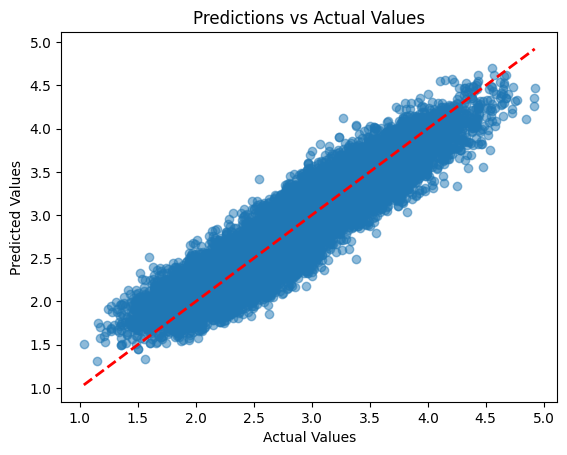

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize predictions
def plot_predictions(y_actual, y_predicted, title):
    plt.scatter(y_actual, y_predicted, alpha=0.5)
    plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], '--', color='red', linewidth=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

# Get predictions on test data
y_predicted_test = X_test @ theta_opt

# Plot predictions
plot_predictions(y_test, y_predicted_test, 'Predictions vs Actual Values')


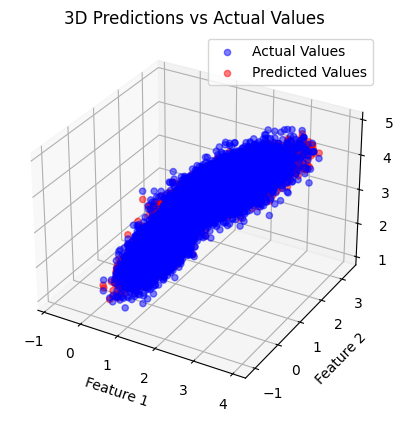

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Function to visualize predictions in 3D
def plot_predictions_3d(X_actual, y_actual, y_predicted, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_actual[:, 1], X_actual[:, 2], y_actual, c='blue', label='Actual Values', alpha=0.5)
    ax.scatter(X_actual[:, 1], X_actual[:, 2], y_predicted, c='red', label='Predicted Values', alpha=0.5)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Values')
    ax.set_title(title)
    ax.legend()
    plt.show()

# Get predictions on test data
y_predicted_test = X_test @ theta_opt

# Plot 3D predictions
plot_predictions_3d(X_test, y_test, y_predicted_test, '3D Predictions vs Actual Values')
